In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
from psi_praktikum.__main__ import *
from tabulate import tabulate


def show(parameters: list):
    keys = [
        "blur_sigma",
        "time_shift",
        "normalization",
        "t_mu",
        "t_pi"
    ]
    print(tabulate(dict(zip(keys,parameters))))

## Find the parameters of the fit between TDC bin numbers and times.

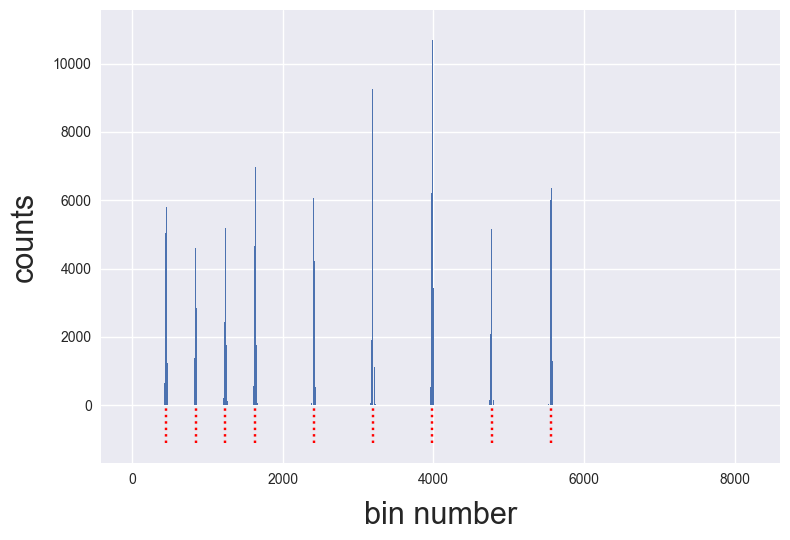

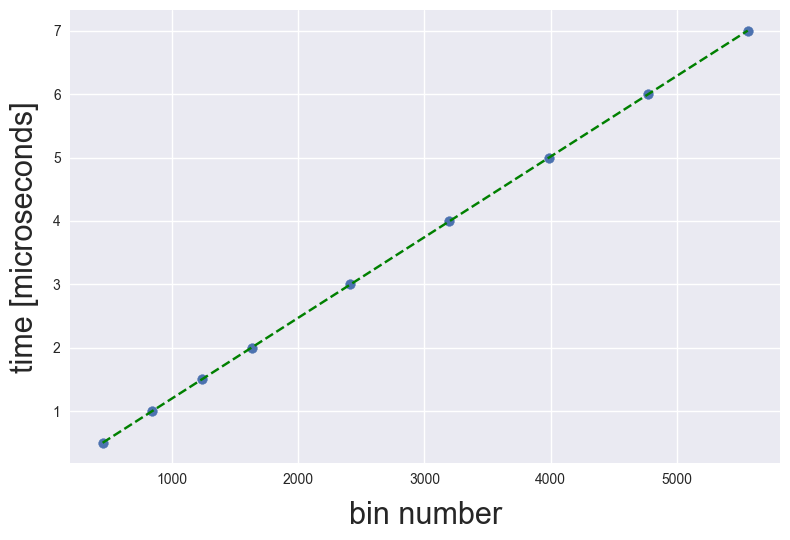

The parameters are [p_1, p_2]=[ 0.00127266 -0.07273329]
The uncertainties are [dp_1, dp_2]=[7.47735862e-07 2.37378797e-03]


In [3]:
parameters, uncertainties = fit_calibration(
    "TimeCalibration_delaytrigger_05to7us.Spe",
    # "TimeCalibration_stepof32ns.Spe",
    times = [
        0.5,
        1,
        1.5,
        2,
        3,
        4,
        5,
        6,
        7,
    ],
    visualize=True,
)

print(f"The parameters are [p_1, p_2]={parameters}")
print(f"The uncertainties are [dp_1, dp_2]={uncertainties}")

In [5]:
BOUNDS=(
    (0., 100),  # time gaus sigma
    (0, 5e-6),  # t0
    (0., 100),  # N0
    (0., 1e-5),  # t_mu
    (0., 1e-5),  # t_pi
)

## Test the fit on a simulated distribution

/opt/homebrew/Caskroom/miniforge/base/envs/psi-praktikum/lib/python3.10/site-packages/scipy/ndimage/_filters.py:235: RuntimeWarning: divide by zero encountered in scalar divide
  phi_x = np.exp(-0.5 / sigma2 * x ** 2)
/opt/homebrew/Caskroom/miniforge/base/envs/psi-praktikum/lib/python3.10/site-packages/scipy/ndimage/_filters.py:235: RuntimeWarning: invalid value encountered in multiply
  phi_x = np.exp(-0.5 / sigma2 * x ** 2)
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:122: RuntimeWarning: invalid value encountered in divide
  - pexp(- (t_shifted / t_pi))
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:121: RuntimeWarning: invalid value encountered in divide
  pexp(- (t_shifted / t_mu))


 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 18302.560469028736
       x: [ 1.650e+01  1.763e-06  5.504e+01  2.244e-06  8.683e-09]
     nit: 1000
    nfev: 18851
    njev: 1475
    nhev: 0
[           nan 8.11394023e-09 1.21099508e+00 2.99477345e-07
 2.89072024e-08]
reduced_chi_squared=np.float64(0.33106838240291037)


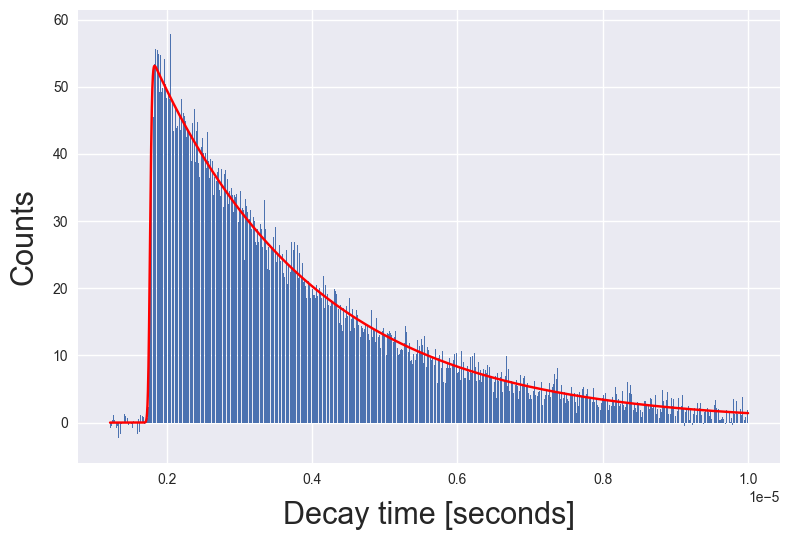

In [25]:
parameters, uncertainties = fit(
    *get_simulated_data(),
    fit_function=ff,
    bounds=BOUNDS
)


## Fit to the real data

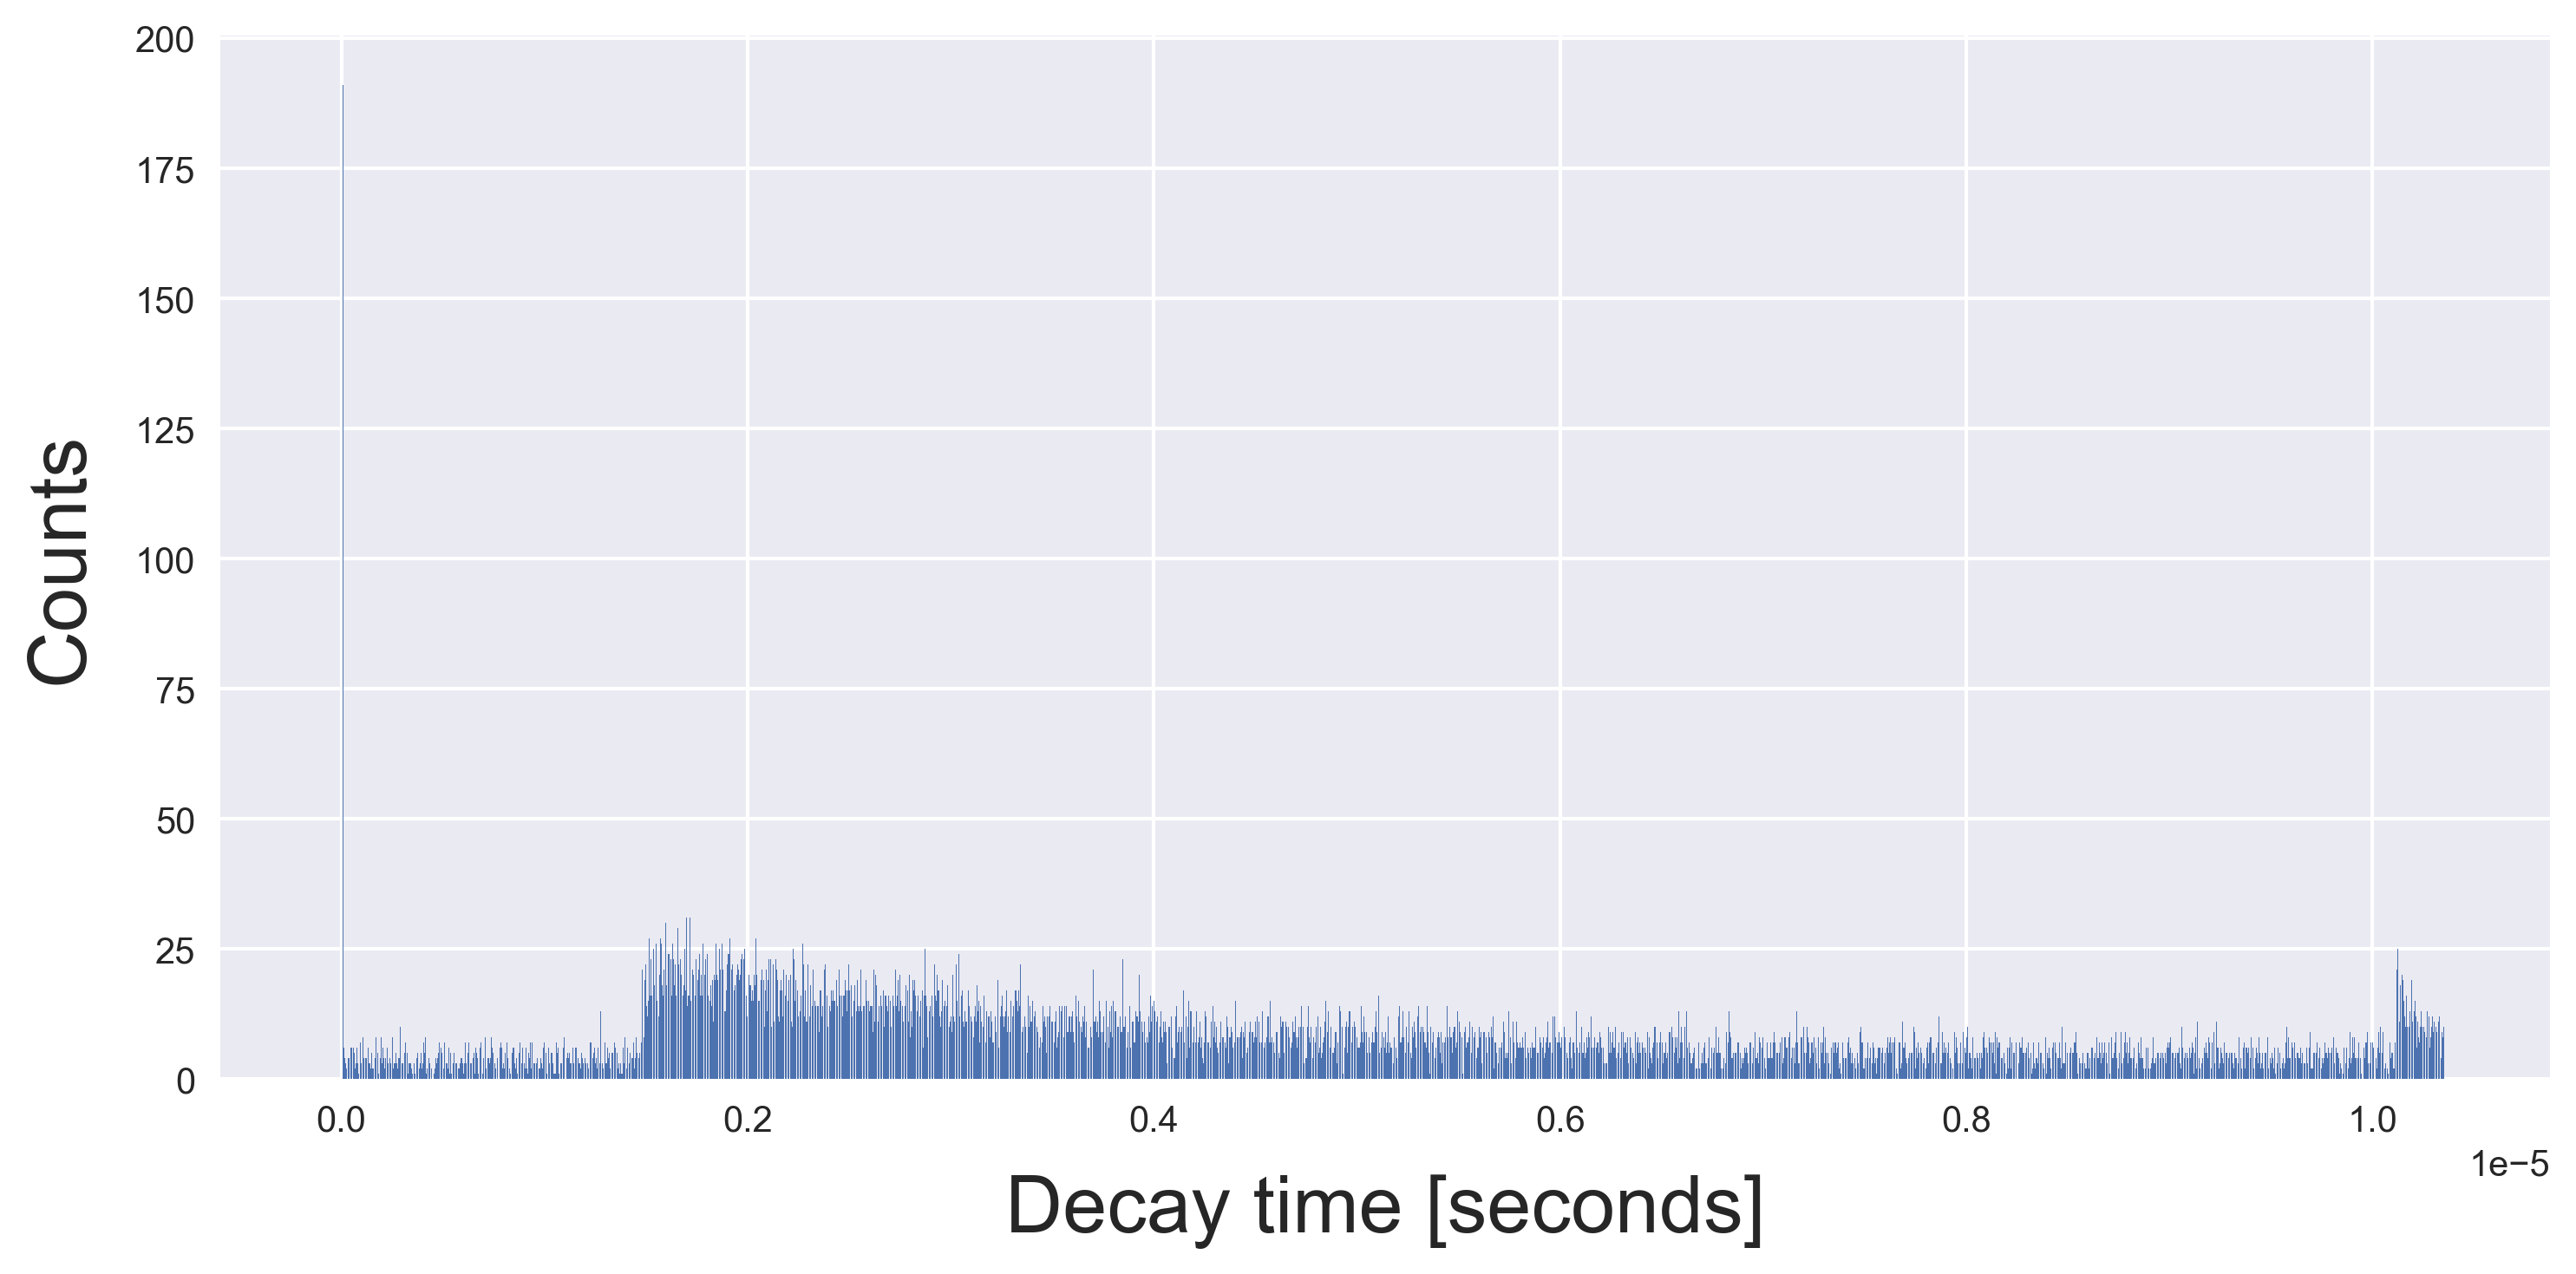

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
times, data, sigmas = get_data(
    "PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_60min_timinggivenbys7.Spe",
    cuts=(None, None),
    subtract_constant_background=False
)

plt.figure(figsize=(10, 5), dpi=300)
plot_data(times, data)



 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 39352.27128547018
       x: [ 1.461e+01  1.460e-06  1.621e+01  2.177e-06  4.326e-08]
     nit: 1000
    nfev: 56225
    njev: 7704
    nhev: 0
[           nan 5.06837675e-07            nan 1.92040969e-06
 6.66031715e-07]
reduced_chi_squared=np.float64(1.7927043801872429)


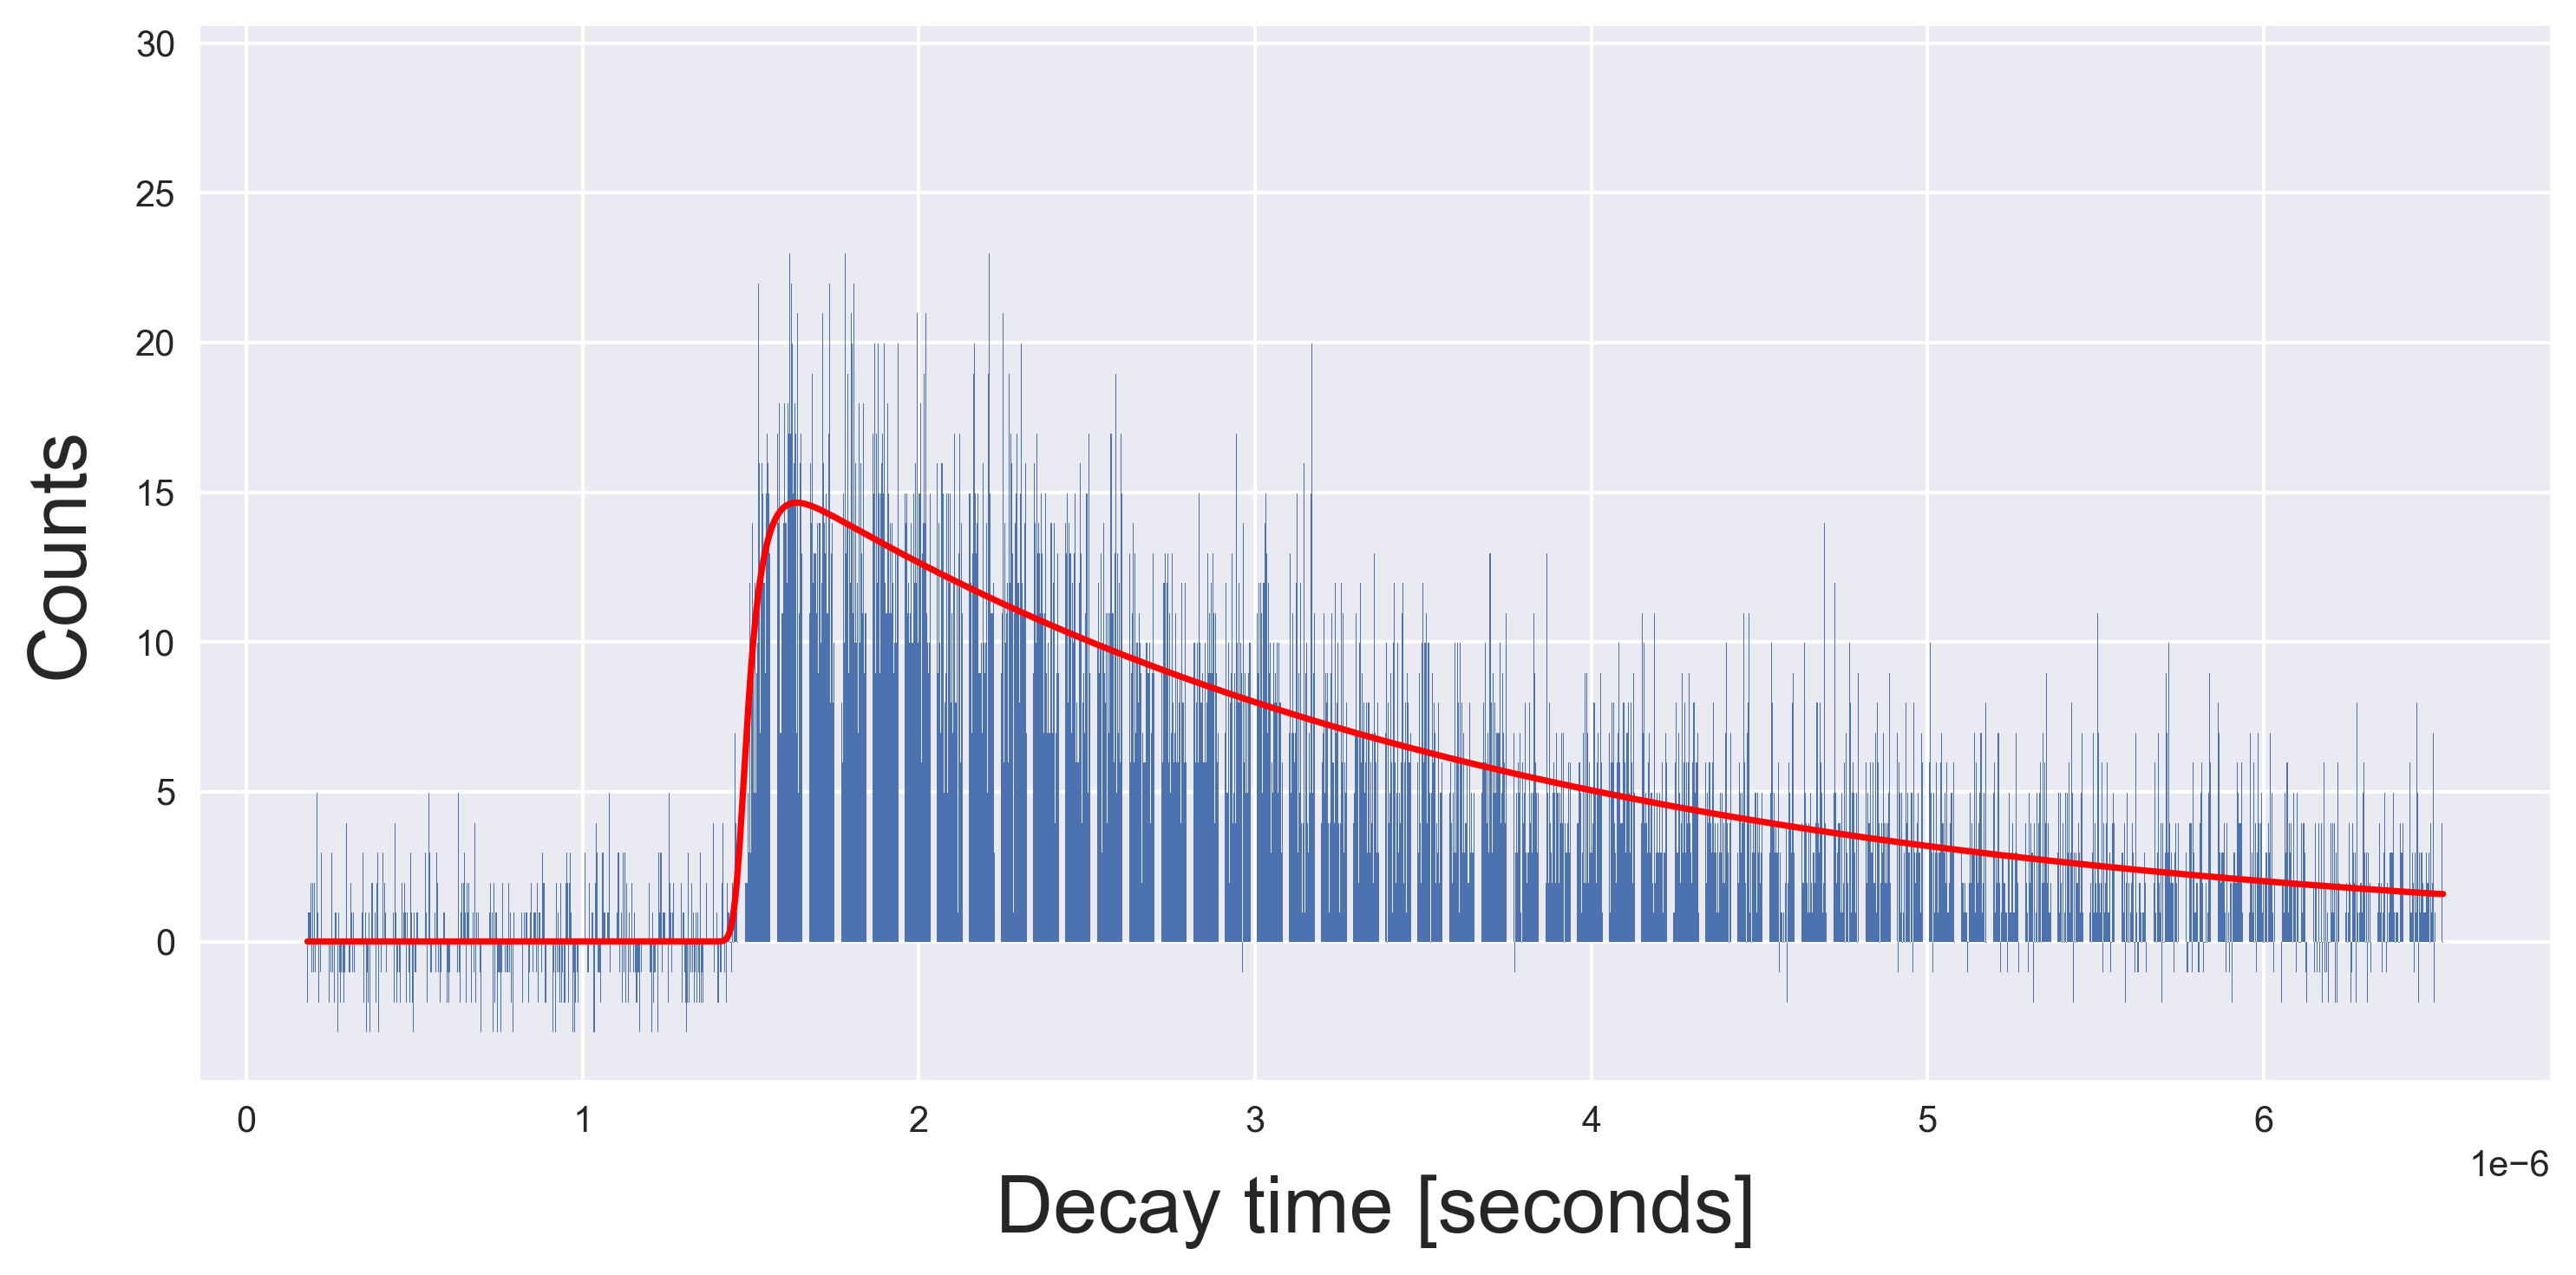

In [21]:
plt.figure(figsize=(10, 5), dpi=300)
filename = "stop_S6andS7_delay_1_5_mus_fs12_50and100mm_30min.Spe"
parameters, uncertainties = fit(
    *get_data(filename),
    fit_function=ff,
    bounds=BOUNDS,
)

col1 = [filename, *parameters]
d_col1 = [filename, *uncertainties]


 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 49235.50464049229
       x: [ 2.527e+01  1.492e-06  1.890e+01  2.248e-06  3.152e-09]
     nit: 1000
    nfev: 16073
    njev: 1012
    nhev: 0
[3.32211942e+02 4.64006049e-08            nan 1.02218037e-06
 4.53616715e-07]
reduced_chi_squared=np.float64(1.8277199382332567)


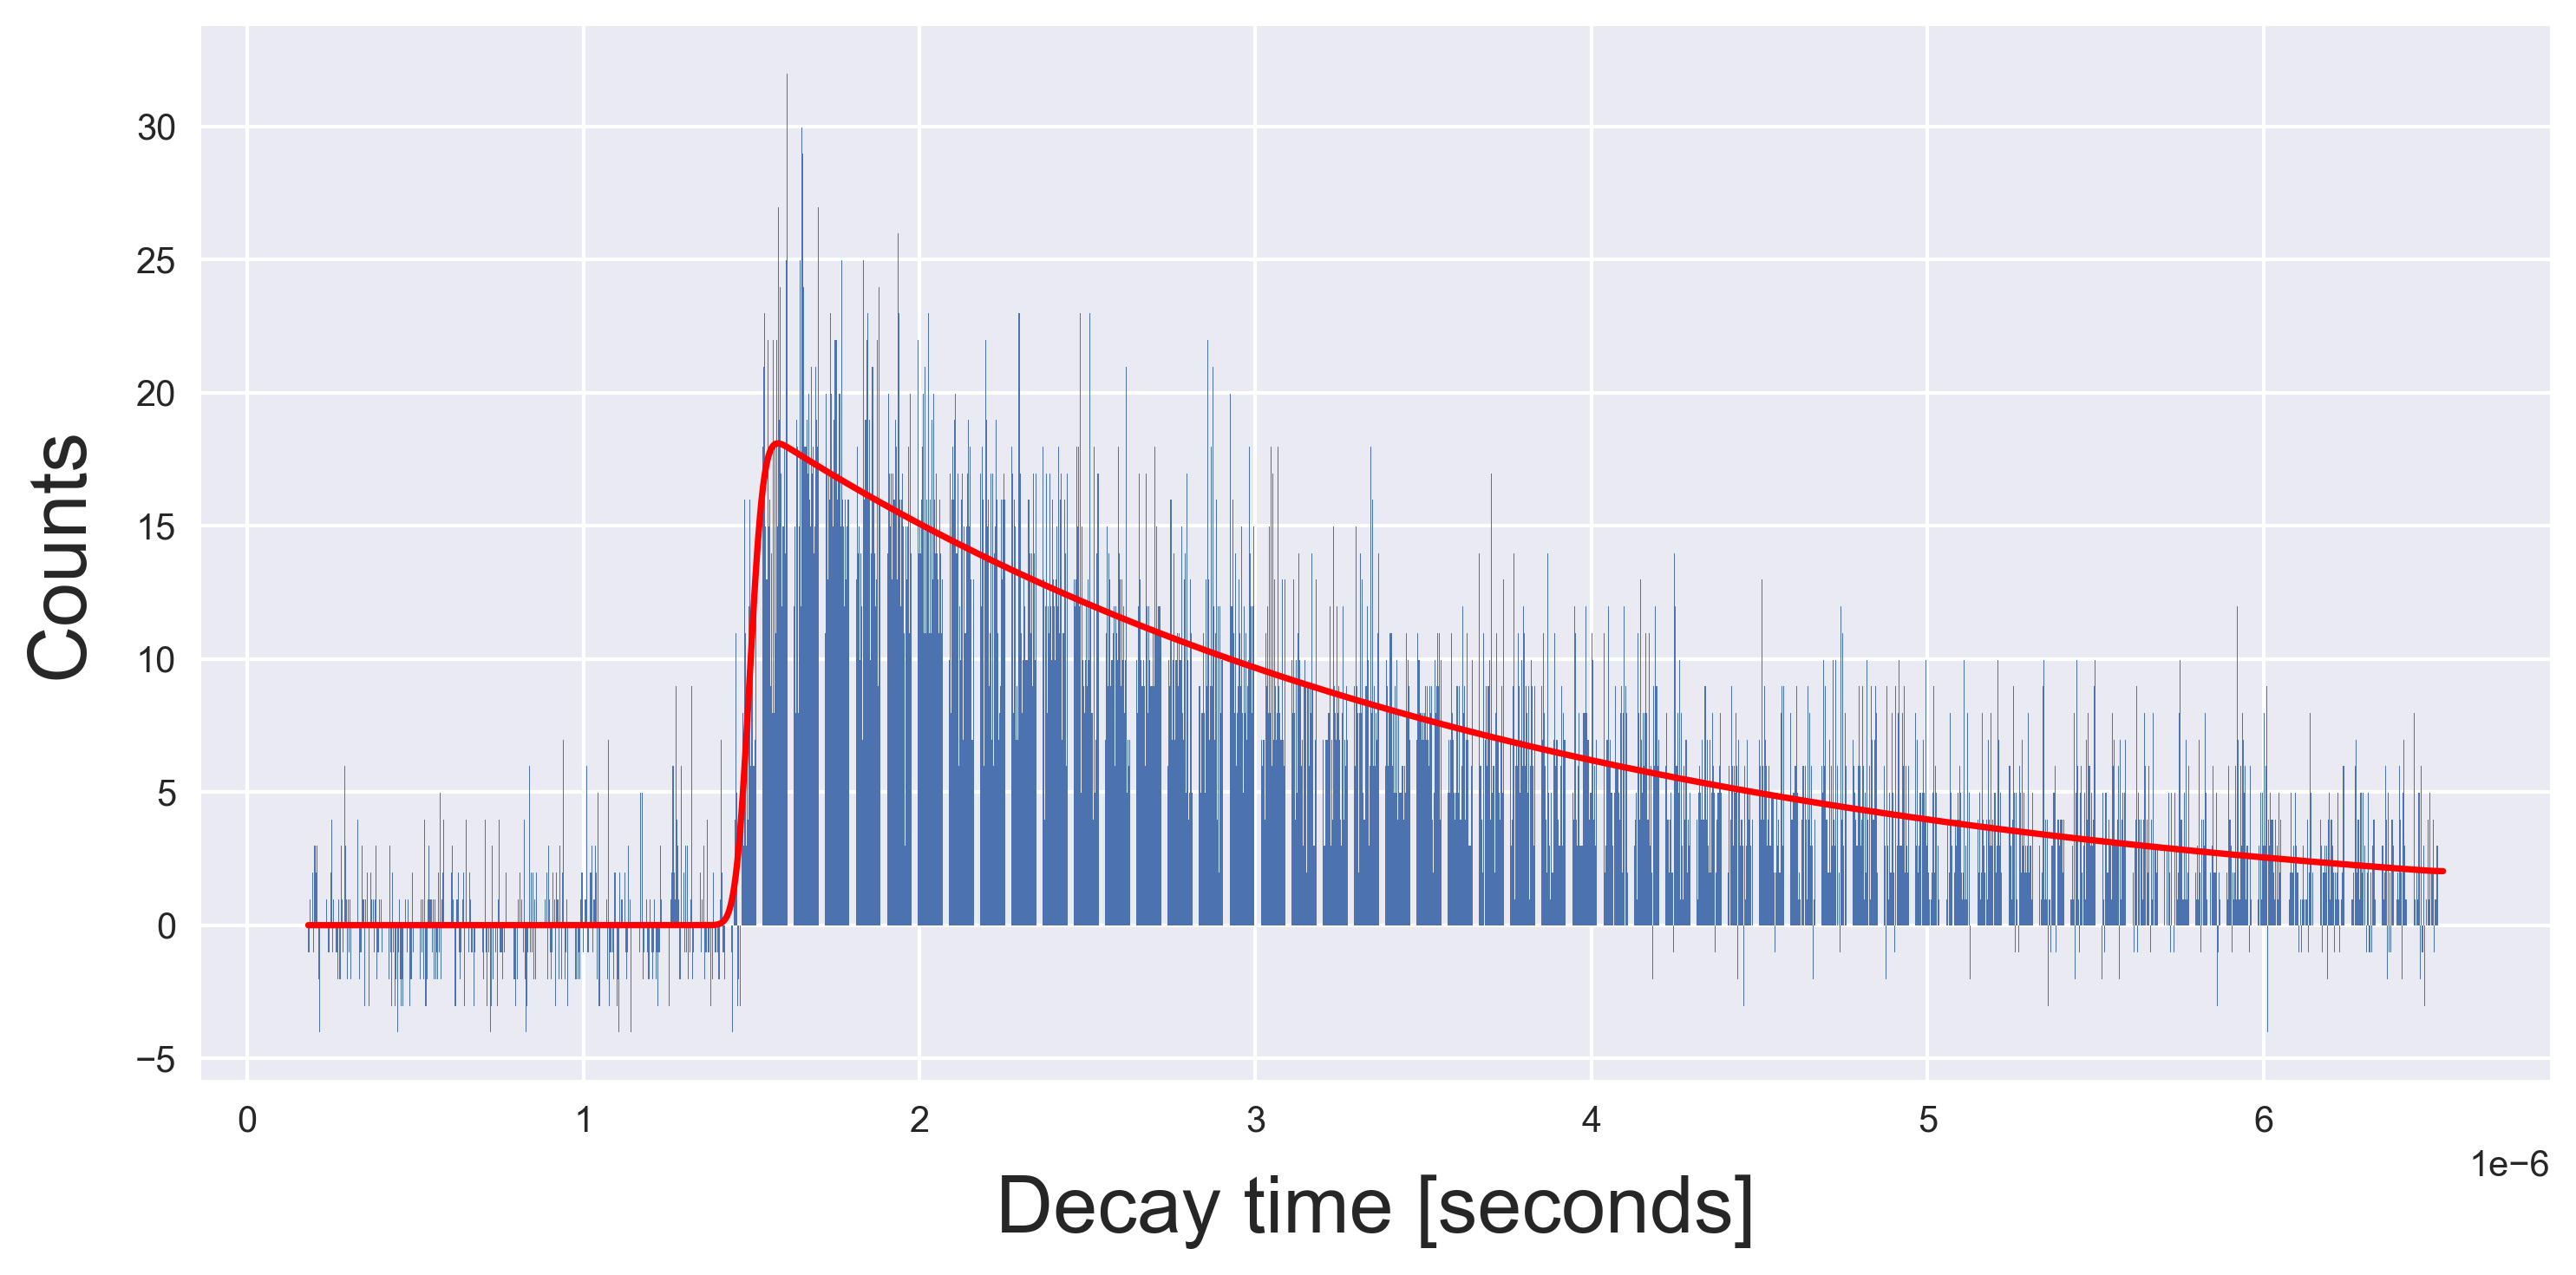

In [26]:
plt.figure(figsize=(10, 5), dpi=300)
filename = "PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_60min_timinggivenbys7.Spe"
parameters, uncertainties = fit(
    *get_data(filename),
    fit_function=ff,
    bounds=BOUNDS,
)

col2 = [filename, *parameters]
d_col2 = [filename, *uncertainties]

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 11147.134287034503
       x: [ 4.262e+01  1.259e-06  8.219e+01  8.181e-07  7.500e-07]
     nit: 1000
    nfev: 15911
    njev: 985
    nhev: 0
[nan nan nan nan nan]
reduced_chi_squared=np.float64(1.7555221186008998)


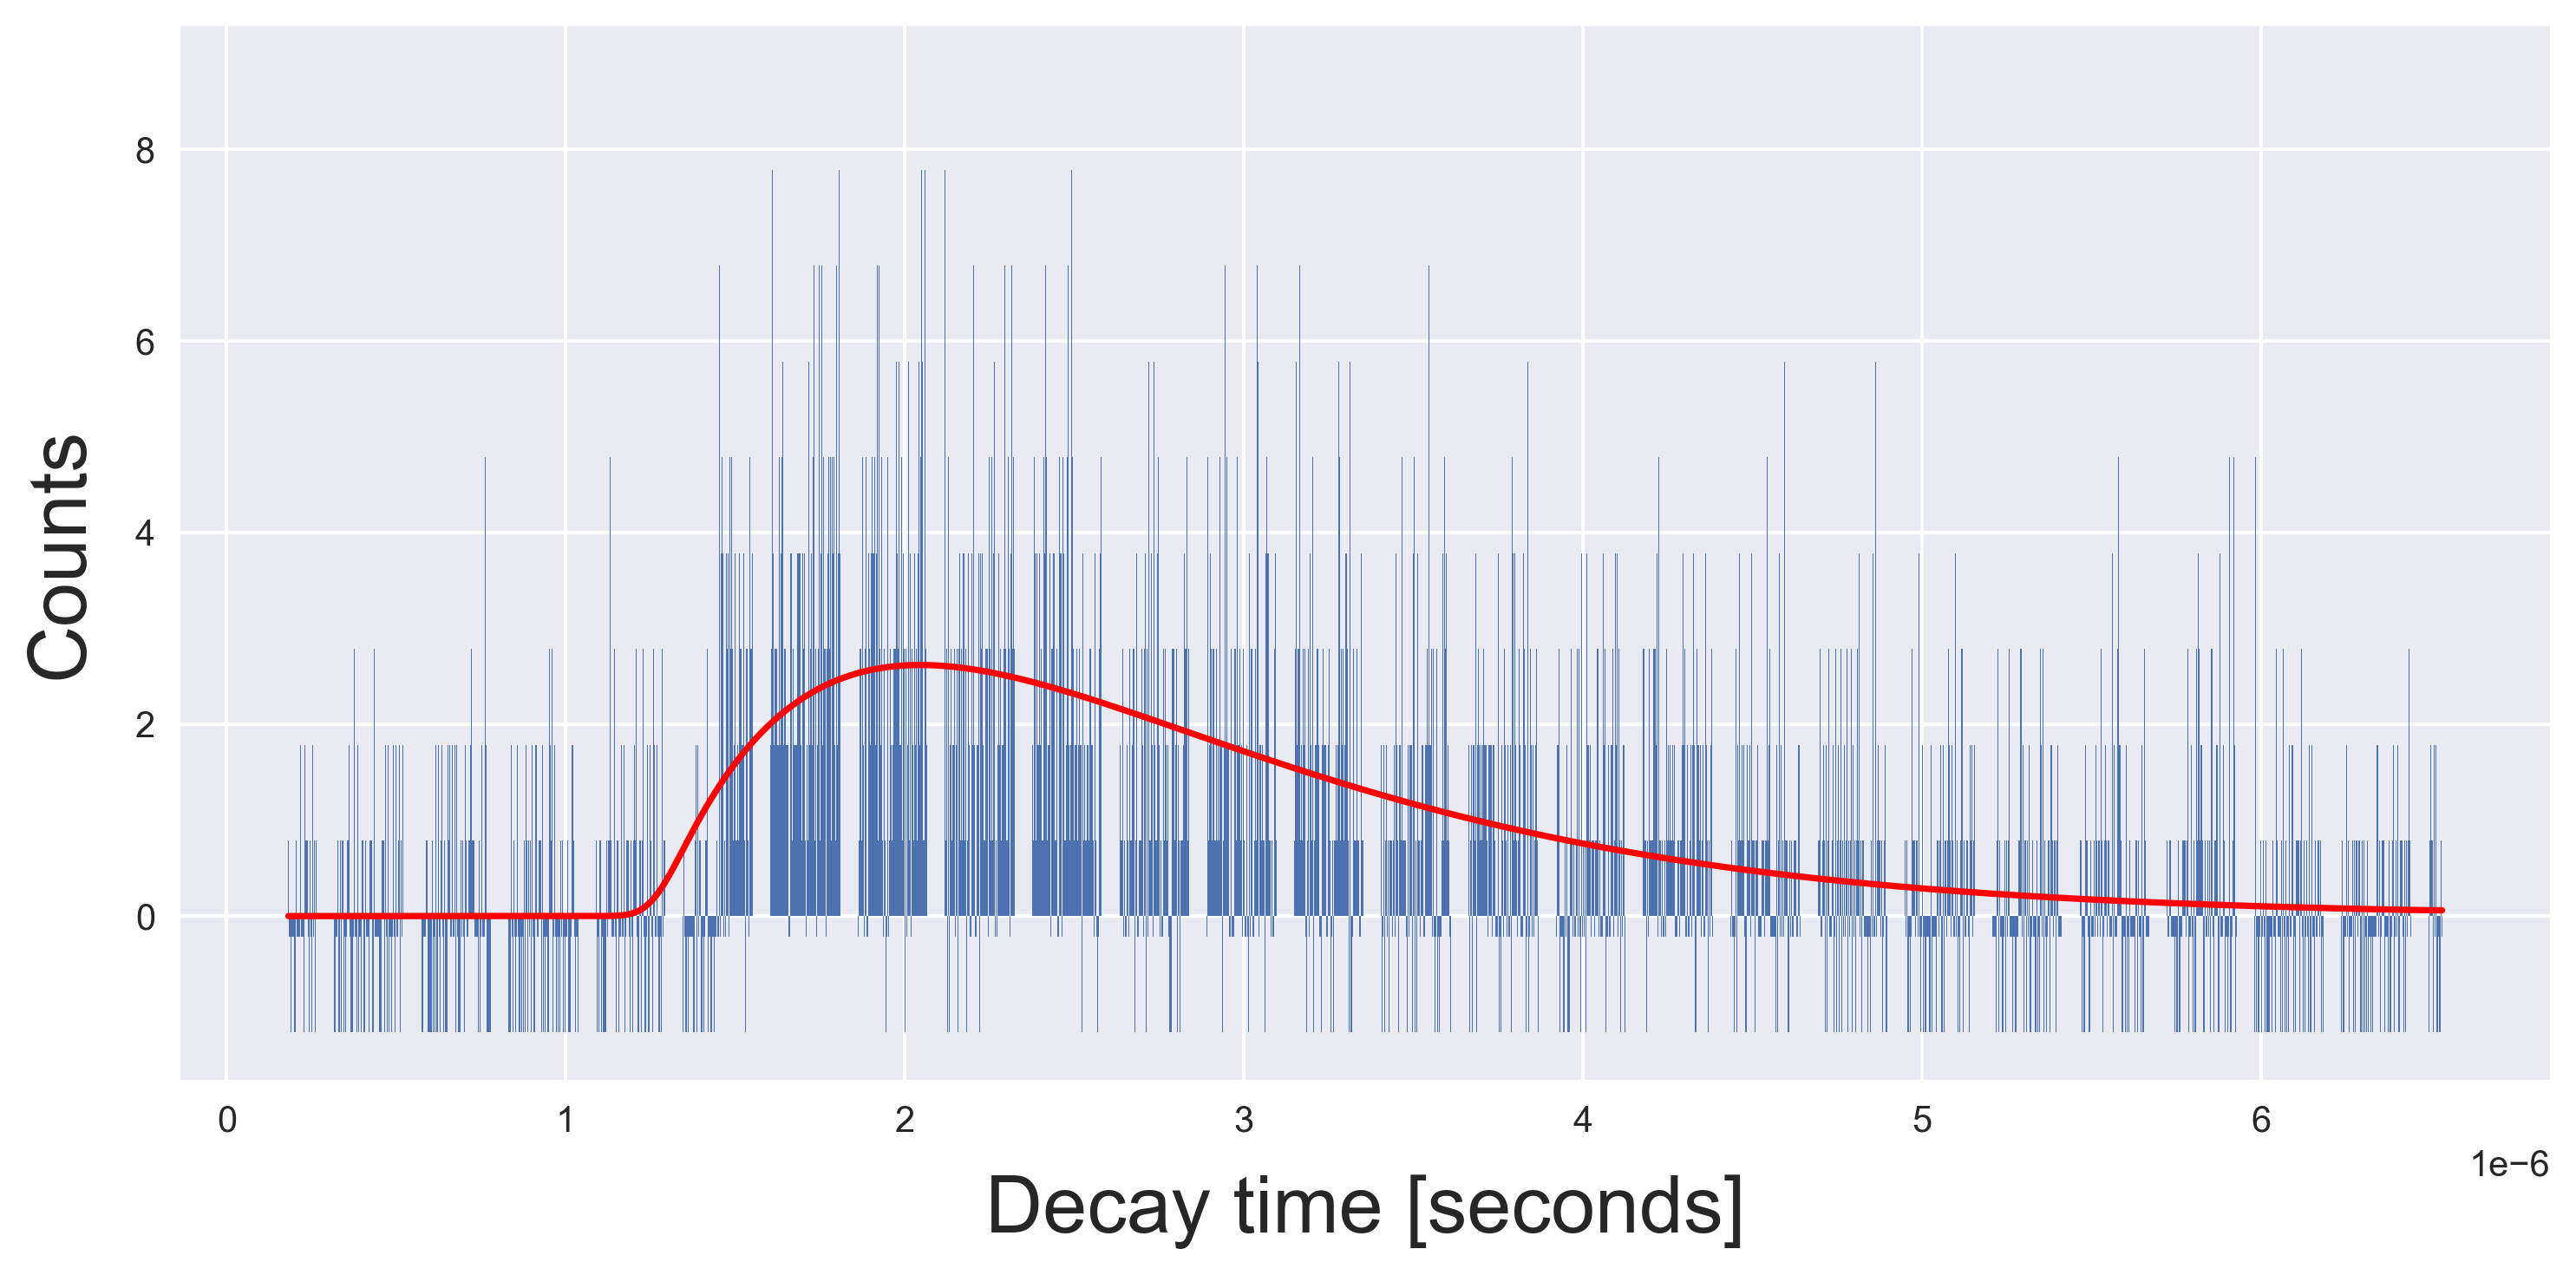

In [31]:
plt.figure(figsize=(10, 5), dpi=300)
filename = "PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_timinggivenbys7_CFD_allstat.Spe"
parameters, uncertainties = fit(
    *get_data(filename),
    fit_function=ff,
    bounds=BOUNDS,
)

col3 = [filename, *parameters]
d_col3 = [filename, *uncertainties]

In [32]:
print(
    tabulate(
        [col1, col2, col3],
        headers=[
            "blur_sigma",
            "time_shift",
            "normalization",
            "t_mu",
            "t_pi"
        ],
    )
)
print(
    tabulate(
        [d_col1, d_col2, d_col3],
        headers=[
            "d_blur_sigma",
            "d_time_shift",
            "d_normalization",
            "d_t_mu",
            "d_t_pi"
        ],
    )
)

                                                                                      blur_sigma    time_shift    normalization         t_mu         t_pi
----------------------------------------------------------------------------------  ------------  ------------  ---------------  -----------  -----------
stop_S6andS7_delay_1_5_mus_fs12_50and100mm_30min.Spe                                     14.6088   1.45967e-06          16.214   2.17728e-06  4.32596e-08
PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_60min_timinggivenbys7.Spe             25.2731   1.49192e-06          18.902   2.24811e-06  3.15238e-09
PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_timinggivenbys7_CFD_allstat.Spe       42.6249   1.2586e-06           82.1907  8.18083e-07  7.5001e-07
                                                                                      d_blur_sigma    d_time_shift    d_normalization         d_t_mu         d_t_pi
-------------------------------------------------------------------